# Titanic: Survival Dataset

Clean, feature engineer, and split the classic Titanic survival dataset from OpenML, uploading the result to Hugging Face ready for ML applications.

Based on https://github.com/fastai/course22/blob/master/clean/05-linear-model-and-neural-net-from-scratch.ipynb using the dataset from https://www.openml.org/search?type=data&sort=runs&id=40945&status=active.

## Plan

- [x] Download dataset from OpenML
- [x] Clean data
- [x] Perform feature engineering
- [x] Split into train/validation/test subsets
- [ ] Upload to Hugging Face

## Download Dataset from OpenML

In [1]:
import openml

dataset = openml.datasets.get_dataset(40945)

In [2]:
import pandas as pd

data, *_ = dataset.get_data()
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,None,C,None,328.0,None
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,None,C,None,NaN,None
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,None,C,None,304.0,None
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,None,C,None,NaN,None


## Clean Data

In [3]:
data.drop(columns=['boat', 'body', 'home.dest'], inplace=True)

In [4]:
data.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

In [5]:
modes = data.mode().iloc[0]
modes

pclass                       3.0
survived                       0
name        Connolly, Miss. Kate
sex                         male
age                         24.0
sibsp                        0.0
parch                        0.0
ticket                  CA. 2343
fare                        8.05
cabin                C23 C25 C27
embarked                       S
Name: 0, dtype: object

In [6]:
data.fillna(modes, inplace=True)
data.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
cabin       0
embarked    0
dtype: int64

## Perform Feature Engineering

In [7]:
import numpy as np

data.describe(include=np.number)

,pclass,age,sibsp,parch,fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,28.699516,0.498854,0.385027,33.276193
std,0.837836,13.097103,1.041658,0.865560,51.743584
min,1.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,24.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


From the dataset we can see that the `fare` column has a very skewed distribution. We can try to transform it into a more normal distribution by taking the log:

<Axes: >

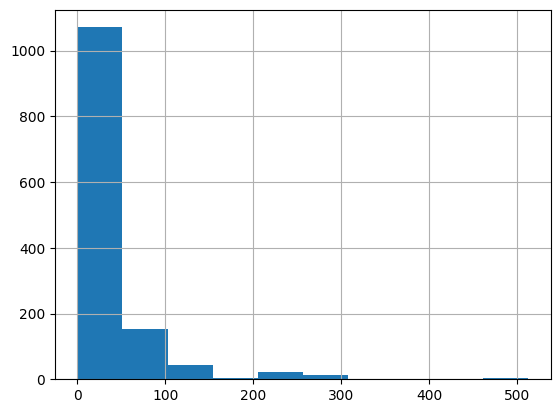

In [8]:
data['fare'].hist()

<Axes: >

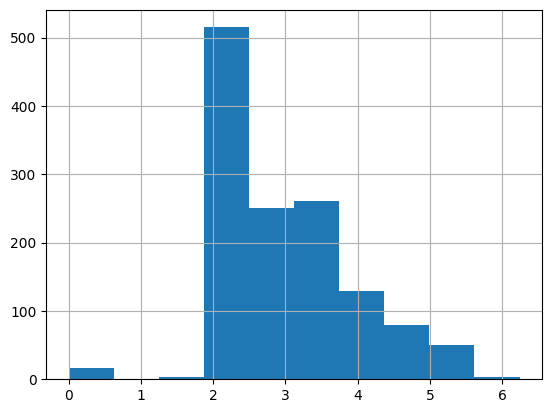

In [9]:
data['log_fare'] = np.log(data['fare']+1)
data['log_fare'].hist()

Also from the dataset we can see that the `pclass` column consists of of integers, but is actually a categorical variable:

In [10]:
sorted(data.pclass.unique())

[np.uint8(1), np.uint8(2), np.uint8(3)]

The same is true of some other non-numeric columns (`survived`, `sex`, `embarked`):

In [11]:
data.describe(exclude=np.number)

,survived,name,sex,ticket,cabin,embarked
count,1309,1309,1309,1309,1309,1309
unique,2,1307,2,929,186,3
top,0,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S
freq,809,2,843,11,1020,916


We convert the categorical variables to dummy variables using one-hot encoding. Note that `survived` is already in the desired form:

In [12]:
data = pd.get_dummies(data, columns=['pclass', 'sex', 'embarked'])
data.columns

Index(['survived', 'name', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin',
       'log_fare', 'pclass_1', 'pclass_2', 'pclass_3', 'sex_female',
       'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')

In [13]:
added_cols = ['pclass_1', 'pclass_2', 'pclass_3', 'sex_female', 'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S']

In [14]:
data

,survived,name,age,sibsp,parch,ticket,fare,cabin,log_fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,5.358177,True,False,False,True,False,False,False,True
1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,5.027492,True,False,False,False,True,False,False,True
2,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,5.027492,True,False,False,True,False,False,False,True
3,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,5.027492,True,False,False,False,True,False,False,True
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,5.027492,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,"Zabour, Miss. Hileni",14.5000,1,0,2665,14.4542,C23 C25 C27,2.737881,False,False,True,True,False,True,False,False
1305,0,"Zabour, Miss. Thamine",24.0000,1,0,2665,14.4542,C23 C25 C27,2.737881,False,False,True,True,False,True,False,False
1306,0,"Zakarian, Mr. Mapriededer",26.5000,0,0,2656,7.2250,C23 C25 C27,2.107178,False,False,True,False,True,True,False,False
1307,0,"Zakarian, Mr. Ortin",27.0000,0,0,2670,7.2250,C23 C25 C27,2.107178,False,False,True,False,True,True,False,False


## Split Into Train/Validation/Test Subsets

In [15]:
from datasets import *

dataset = Dataset.from_pandas(data)

In [16]:
train_dataset, validation_dataset = dataset.train_test_split(0.2, seed=42).values()
validation_dataset, test_dataset = validation_dataset.train_test_split(0.5, seed=42).values()

In [17]:
dataset_dict = DatasetDict({'train': train_dataset,
                            'validation': validation_dataset,
                            'test': test_dataset})

dataset_dict

DatasetDict({
    train: Dataset({
        features: ['survived', 'name', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'log_fare', 'pclass_1', 'pclass_2', 'pclass_3', 'sex_female', 'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S'],
        num_rows: 1047
    })
    validation: Dataset({
        features: ['survived', 'name', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'log_fare', 'pclass_1', 'pclass_2', 'pclass_3', 'sex_female', 'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S'],
        num_rows: 131
    })
    test: Dataset({
        features: ['survived', 'name', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'log_fare', 'pclass_1', 'pclass_2', 'pclass_3', 'sex_female', 'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S'],
        num_rows: 131
    })
})